In [1]:
import dotenv
import os
import torch
from src.model.dataloader import DataLoaders
from src.model.cnn_attn import CNNAttention
from src.model.trainer import Trainer
from src.utils.utils import *
import pandas as pd
dotenv.load_dotenv()

True

In [2]:
data = torch.load(f'{os.getenv('DATASET_PATH')}/dataset.pt')
pos, evals = data['X'], data['y']
evals = scale_for_nn(evals)


In [3]:
model = CNNAttention()

In [4]:
trainer = Trainer(model, pos, evals)

In [5]:
trainer.train(store_epoch=True)

Epoch 1/10: 100%|██████████| 19868/19868 [02:19<00:00, 142.17it/s, loss=3.63e-8] 


Validation Loss: 0.000000


Epoch 2/10: 100%|██████████| 19868/19868 [02:18<00:00, 143.43it/s, loss=3.24e-10]


Validation Loss: 0.000000


Epoch 3/10: 100%|██████████| 19868/19868 [02:15<00:00, 146.29it/s, loss=8.16e-14]


Validation Loss: 0.000000


Epoch 4/10: 100%|██████████| 19868/19868 [02:12<00:00, 149.79it/s, loss=4.94e-10]


Validation Loss: 0.000000


Epoch 5/10:   7%|▋         | 1479/19868 [00:09<02:03, 148.75it/s, loss=5.69e-10]


KeyboardInterrupt: 

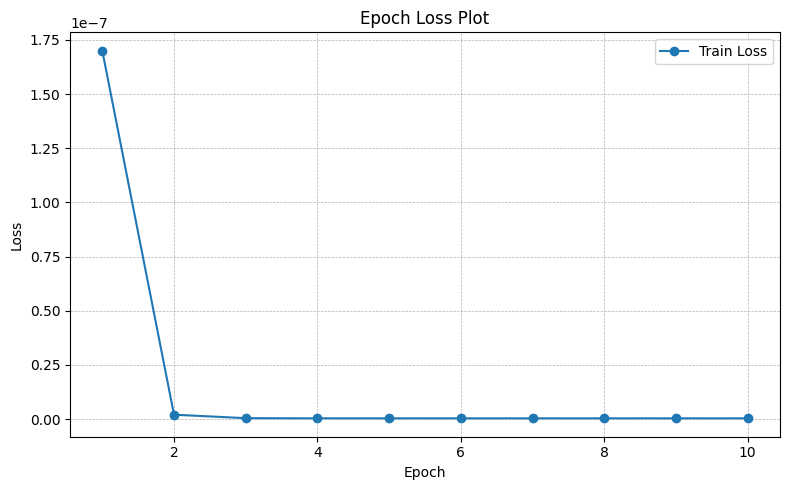

In [7]:
import matplotlib.pyplot as plt

# Assuming trainer.train_losses has 10 values
epochs = list(range(1, 11))
losses = trainer.train_losses

plt.figure(figsize=(8, 5))
plt.plot(epochs, losses, marker='o', label='Train Loss')

plt.title('Epoch Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
trainer.train_losses


[1.6997792972811958e-07,
 2.0458900570358567e-09,
 4.548146823334634e-10,
 3.6971649899662647e-10,
 3.7052286204463755e-10,
 3.6970402389397563e-10,
 3.693251391583191e-10,
 3.6992004602994786e-10,
 3.7044254922092935e-10,
 3.6789238855438835e-10]

In [10]:
test_loader = trainer.test_loader
model.to("cpu")

CNNAttention(
  (conv_layers): Sequential(
    (0): Conv2d(17, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
  )
  (attn_layer): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
  )
  (attn_pool): _AttentionPooling()
  (fc): Linear(in_features=128, out_features=1, bias=True)
)

In [34]:
import numpy as np
def smape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(np.abs(y_pred - y_true) / (denominator + 1e-8)) * 100

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import torch

device = get_device()
model = CNNAttention()
model.load_state_dict(torch.load(f"{os.getenv("TRAIN_EPOCH_PATH")}/model_epoch_10.pth",map_location=torch.device("cpu")))
model = model.to(device)
# Accumulate all predictions and targets
all_preds = []
all_targets = []

model.eval()  # set model to eval mode
with torch.no_grad():
    for pos, eval in test_loader:
        pos=pos.to(device)
        out_eval = model(pos)

        # Store predictions and true values
        all_preds.extend(out_eval.cpu().numpy().flatten())
        all_targets.extend(eval.cpu().numpy().flatten())

# Compute metrics
MAE = mean_absolute_error(all_targets, all_preds)
MSE = mean_squared_error(all_targets, all_preds)
MAPE = smape(all_targets,all_preds)
r2 = r2_score(all_targets, all_preds)

print(f"Mean Absolute Error (MAE): {MAE:.6f}")
print(f"Mean Squared Error (MSE): {MSE:.6f}")
print(f"MAPE : {MAPE}")
print(f"R^2 Score: {r2:.6f}")

    
    

Mean Absolute Error (MAE): 0.000031
Mean Squared Error (MSE): 0.000000
MAPE : 195.06854248046875
R^2 Score: -38.398329


# experiment

In [20]:
from src.preprocess.preprocess import Preprocess

prep = Preprocess('/Users/sharanraj/Documents/Aizen-bot/dataset/test_games.pgn')
pos, eval = prep.preprocess()
scaled_eval = scale_for_nn(eval)

Read 1....


Processing Games: 100%|██████████| 1/1 [00:00<00:00, 150.67game/s]

Time taken: 0h 0m 0s


In [27]:
model = model.to("cpu")
model.eval()
with torch.no_grad():
    out_scaled = model(pos)


In [23]:
output = decode_nn_output(out_scaled)

In [28]:
out_scaled

tensor([[3.1119e-05],
        [3.1175e-05],
        [3.1134e-05],
        [3.1180e-05],
        [3.1144e-05],
        [3.1182e-05],
        [3.1142e-05],
        [3.1189e-05],
        [3.1148e-05],
        [3.1197e-05],
        [3.1153e-05],
        [3.1194e-05],
        [3.1162e-05],
        [3.1187e-05],
        [3.1155e-05],
        [3.1162e-05],
        [3.1117e-05],
        [3.1103e-05],
        [3.1092e-05],
        [3.1083e-05],
        [3.1056e-05],
        [3.1069e-05],
        [3.1061e-05],
        [3.1052e-05],
        [3.1054e-05],
        [3.1093e-05],
        [3.1038e-05],
        [3.1110e-05],
        [3.1076e-05],
        [3.1109e-05],
        [3.1104e-05],
        [3.1129e-05],
        [3.1065e-05],
        [3.1107e-05],
        [3.1270e-05],
        [3.1090e-05],
        [3.1274e-05],
        [3.1078e-05],
        [3.1260e-05],
        [3.1109e-05],
        [3.1248e-05],
        [3.1118e-05],
        [3.1241e-05],
        [3.1105e-05],
        [3.1243e-05],
        [3

In [29]:
scaled_eval

tensor([[ 5.6250e-04],
        [ 8.7500e-04],
        [ 8.7500e-04],
        [ 1.1563e-03],
        [ 8.7500e-04],
        [ 1.0000e-03],
        [ 3.4375e-04],
        [ 1.5313e-03],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 4.0625e-04],
        [-5.6250e-04],
        [ 0.0000e+00],
        [-6.2500e-04],
        [ 5.3125e-04],
        [ 7.5000e-04],
        [ 1.9375e-03],
        [ 1.3438e-03],
        [ 1.8438e-03],
        [-6.2500e-04],
        [-7.8125e-04],
        [-7.8125e-04],
        [-7.5000e-04],
        [-9.3750e-04],
        [-3.1250e-04],
        [-3.7500e-04],
        [ 5.6250e-04],
        [-9.3750e-05],
        [ 5.6250e-04],
        [ 3.7500e-04],
        [ 3.1250e-04],
        [ 3.7500e-04],
        [ 1.8750e-04],
        [ 2.1875e-04],
        [ 6.8750e-04],
        [ 6.5625e-04],
        [ 4.3750e-04],
        [ 4.0625e-04],
        [ 6.5625e-04],
        [ 0.0000e+00],
        [ 1.8750e-04],
        [ 4.0625e-04],
        [ 1

In [25]:
eval

tensor([[ 1.8000e+01],
        [ 2.8000e+01],
        [ 2.8000e+01],
        [ 3.7000e+01],
        [ 2.8000e+01],
        [ 3.2000e+01],
        [ 1.1000e+01],
        [ 4.9000e+01],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 1.3000e+01],
        [-1.8000e+01],
        [ 0.0000e+00],
        [-2.0000e+01],
        [ 1.7000e+01],
        [ 2.4000e+01],
        [ 6.2000e+01],
        [ 4.3000e+01],
        [ 5.9000e+01],
        [-2.0000e+01],
        [-2.5000e+01],
        [-2.5000e+01],
        [-2.4000e+01],
        [-3.0000e+01],
        [-1.0000e+01],
        [-1.2000e+01],
        [ 1.8000e+01],
        [-3.0000e+00],
        [ 1.8000e+01],
        [ 1.2000e+01],
        [ 1.0000e+01],
        [ 1.2000e+01],
        [ 6.0000e+00],
        [ 7.0000e+00],
        [ 2.2000e+01],
        [ 2.1000e+01],
        [ 1.4000e+01],
        [ 1.3000e+01],
        [ 2.1000e+01],
        [ 0.0000e+00],
        [ 6.0000e+00],
        [ 1.3000e+01],
        [ 4